In [13]:
# Import necessary libraries
import panel as pn
from panel.interact import interact
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import seaborn as sns

In [14]:
# Set path to lifestyle data and crime data
lifestyle_path = Path('Clean_Data/clean_lifestyle_data.csv')
crime_path = Path('Clean_Data/clean_crime_data.csv')

In [15]:
# Read in CSV files
lifestyle_data = pd.read_csv(lifestyle_path, index_col='Metropolitan/FMR Area Name')
crime_data = pd.read_csv(crime_path, index_col='Metropolitan/FMR Area Name')

In [16]:
# Check tables
lifestyle_data.head()

,Apparel and Services,Men's Apparel,Women's Apparel,Children's Apparel,Footwear,Watches & Jewelry,Apparel Products and Services (1),Computers and Hardware for Home Use,Portable Memory,Computer Software,...,Vehicle Insurance,Life/Other Insurance,Health Insurance,Personal Care Products (18),School Books and Supplies (19),Smoking Products,Gasoline and Motor Oil,Airline Fares,Lodging on Trips,Auto/Truck Rental on Trips
Metropolitan/FMR Area Name,,,,,,,,,,,,,,,,,,,,,
"New York, NY",133,136,125,131,141,139,160,126,130,146,...,114,110,111,124,126,114,111,130,114,127
"Los Angeles, CA",115,119,113,115,118,108,125,122,118,131,...,105,99,100,111,117,93,110,123,108,119
"Chicago, IL",117,119,114,116,119,111,124,120,117,127,...,108,104,105,113,116,98,111,122,111,119
"Houston, TX",110,111,107,118,110,104,103,111,108,109,...,113,102,105,110,113,102,111,108,105,110
"Phoenix, AZ",103,105,101,107,102,97,98,105,102,103,...,106,97,101,104,106,96,104,103,100,105


In [17]:
crime_data.head()

,Crime Index
Metropolitan/FMR Area Name,
"New York, NY",47.35
"Los Angeles, CA",48.89
"Chicago, IL",65.17
"Houston, TX",63.95
"Phoenix, AZ",51.93


In [18]:
# Drop additional unneccessary columns from lifestyle_data
filter_lifestyle_data = lifestyle_data[['Mortgage Payment and Basics (11)', 'Maintenance and Remodeling Services', 'Maintenance and Remodeling Materials (12)', 'Child Care', 
                                        'Owners and Renters Insurance', 'Vehicle Insurance', 'Life/Other Insurance', 'Health Insurance', 'Gasoline and Motor Oil']]

In [19]:
# Check table
filter_lifestyle_data.head()

,Mortgage Payment and Basics (11),Maintenance and Remodeling Services,Maintenance and Remodeling Materials (12),Child Care,Owners and Renters Insurance,Vehicle Insurance,Life/Other Insurance,Health Insurance,Gasoline and Motor Oil
Metropolitan/FMR Area Name,,,,,,,,,
"New York, NY",109,104,94,131,93,114,110,111,111
"Los Angeles, CA",110,106,95,121,88,105,99,100,110
"Chicago, IL",112,109,99,121,96,108,104,105,111
"Houston, TX",105,103,103,114,105,113,102,105,111
"Phoenix, AZ",99,99,98,102,100,106,97,101,104


In [20]:
# Join with crime data
crime_lifestyle_data = pd.merge(filter_lifestyle_data, crime_data, on='Metropolitan/FMR Area Name', how='inner')
crime_lifestyle_data.head()

,Mortgage Payment and Basics (11),Maintenance and Remodeling Services,Maintenance and Remodeling Materials (12),Child Care,Owners and Renters Insurance,Vehicle Insurance,Life/Other Insurance,Health Insurance,Gasoline and Motor Oil,Crime Index
Metropolitan/FMR Area Name,,,,,,,,,,
"New York, NY",109,104,94,131,93,114,110,111,111,47.35
"Los Angeles, CA",110,106,95,121,88,105,99,100,110,48.89
"Chicago, IL",112,109,99,121,96,108,104,105,111,65.17
"Houston, TX",105,103,103,114,105,113,102,105,111,63.95
"Phoenix, AZ",99,99,98,102,100,106,97,101,104,51.93


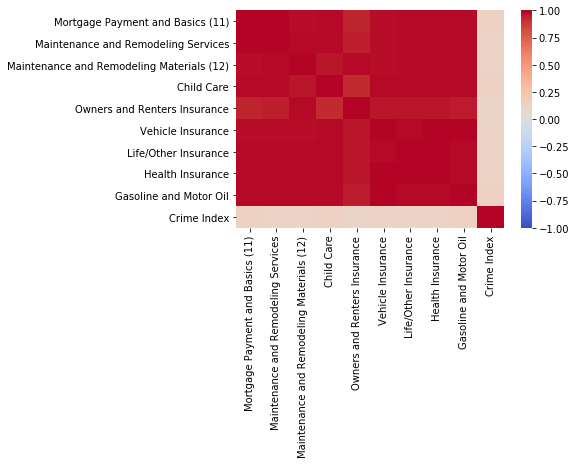

In [22]:
# Create a heatmap showing correlation between crime index and value of other columns
correlation = crime_lifestyle_data.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, cmap='coolwarm')